In [9]:
import pandas as pd
import re

In [2]:
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager, rc
import matplotlib as mpl

font_path = '../resources/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()

# '-' 출력 깨지는 거 방지
mpl.rcParams['axes.unicode_minus'] = False
rc('font', family=font_name)

# Word2Vec

In [3]:
embedding_model = Word2Vec.load('./datasets/book_token_word2Vec.model')

In [84]:
keyword = '등교'
sim_words = embedding_model.wv.most_similar(keyword, topn=10)
print(keyword, "\n", sim_words)

등교 
 [('학교', 0.6139463186264038), ('전학', 0.5896528959274292), ('학생', 0.5506583452224731), ('며칠', 0.5361349582672119), ('딸아이', 0.523151159286499), ('교통사고', 0.5197806358337402), ('결석', 0.5134497880935669), ('기숙사', 0.5131609439849854), ('교문', 0.507175087928772), ('아토피', 0.5035790205001831)]


In [73]:
keywords = ['사랑', '우정', '꿈', '워라밸', '앱', '오크스', '예수의', '개츠비']

for keyword in keywords:
    sim_words = embedding_model.wv.most_similar(keyword, topn=10)
    print(keyword, "\n", sim_words)

사랑 
 [('사랑은', 0.7514970898628235), ('사랑으로', 0.7141029834747314), ('연인', 0.6150267124176025), ('우정', 0.6118912696838379), ('순수', 0.5991134643554688), ('갈구', 0.597068727016449), ('이별', 0.5889774560928345), ('애절', 0.5875186324119568), ('약희를', 0.5867823362350464), ('애틋', 0.5863896608352661)]
우정 
 [('사랑과', 0.7305378317832947), ('사랑', 0.6118913292884827), ('친구', 0.5683395862579346), ('우정은', 0.5675408840179443), ('워라밸에', 0.5651040077209473), ('애틋', 0.5476541519165039), ('배신', 0.5455005764961243), ('동희', 0.5398021936416626), ('쌍동이', 0.5378511548042297), ('남녀', 0.535624623298645)]
꿈 
 [('쓰바메의', 0.6786670684814453), ('꿈속', 0.6242449283599854), ('실현', 0.5919643640518188), ('원대', 0.5623909831047058), ('희망', 0.556791365146637), ('소망', 0.5531705021858215), ('장사의', 0.5527005195617676), ('나비의', 0.5371220111846924), ('좌절', 0.5166428685188293), ('카멜롯', 0.5079713463783264)]
워라밸 
 [('업무', 0.5307522416114807), ('직장', 0.5160753726959229), ('임직원', 0.5150331258773804), ('윗선', 0.513380229473114), ('야근', 0.5042

               x           y
word                        
실재     25.333313  137.355438
실제      7.562700   55.511360
경계    -46.175022  119.019073
사실     -3.627466  -26.924252
현실    -57.365414   36.583805
픽션     80.298347   76.715973
혼융    -75.135582  -45.260891
리얼리티 -116.335182   96.057037
환상   -130.102448   15.378823
개연     66.532829   -3.962131
허구      0.000000    0.000000


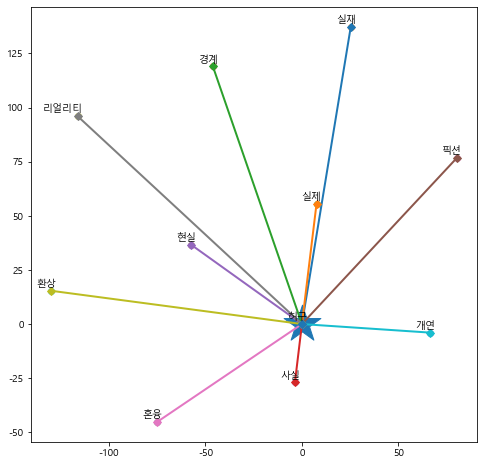

In [5]:
keyword = '허구'
sim_words = embedding_model.wv.most_similar(keyword, topn=10)

labels = []
vectors = []
for word, _ in sim_words:
    labels.append(word)
    vectors.append(embedding_model.wv[word])

df_vector = pd.DataFrame(vectors)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
n_vectors = tsne_model.fit_transform(df_vector)

df_xy = pd.DataFrame({'word': labels, 'x': n_vectors[:, 0], 'y': n_vectors[:, 1]}).set_index('word')
df_xy.loc[keyword] = (0, 0)
print(df_xy)

plt.figure(figsize=(8, 8))

plt.scatter(0, 0, s=1500, marker='*')
for word in df_xy.index:
    x, y = df_xy.loc[word]
    plt.plot([0, x], [0, y], '-D', linewidth=2)
    plt.scatter(x, y)
    plt.annotate(word, xytext=(5, 2), xy=(x, y), textcoords='offset points', 
                 ha='right', va='bottom')
plt.show()

# Error checking

In [6]:
df_book = pd.read_csv('./datasets/book_cleaned_token.csv', index_col=0)

은, 는, 이, 가, 을, 를, 와, 과, 의, 에, 에게, 에서, 에게서, 으로, 께서

In [19]:
PAT_JOSA = re.compile(r'.+([은는이가을를과와의에]|에게서?|(에|께)서|으로)')

In [22]:
sentence = '사랑 사랑은 약희는 사랑이 약희가 사랑을 약희를 사랑과 양희와 사람의 눈에 은 정은지 아무거나 사랑으로 사랑에게서 사랑에게 사랑에서 사랑께서'

words = sentence.split(' ')
new_words = []
for word in words:
    if PAT_JOSA.fullmatch(word):
        print(word, end=' ')
    else:
        new_words.append(word)

print('\n', '---------------------------')
print(' '.join(new_words))

사랑은 약희는 사랑이 약희가 사랑을 약희를 사랑과 양희와 사람의 눈에 사랑으로 사랑에게서 사랑에게 사랑에서 사랑께서 
 ---------------------------
사랑 은 정은지 아무거나


In [55]:
PAT_JOSA = re.compile(r'.+([은는이가을를과와의에]|에게서?|(에|께)서|으로)')

patch = {}

for info in df_book['info']:
    words = info.split(' ')
    
    for word in words:
        if PAT_JOSA.fullmatch(word): 
            josa = PAT_JOSA.findall(word)[0][0]
            patch[word] = word[:-len(josa)]
            
patch

{'작가': '작',
 '검은': '검',
 '고양이': '고양',
 '가의': '가',
 '낸터킷의': '낸터킷',
 '핌의': '핌',
 '아쿠타가와': '아쿠타가',
 '어린이': '어린',
 '미야자와': '미야자',
 '평가': '평',
 '다자이': '다자',
 '바가': '바',
 '소설가': '소설',
 '쇼와': '쇼',
 '가와': '가',
 '이시카와': '이시카',
 '오가와': '오가',
 '미메이': '미메',
 '사와': '사',
 '구로사와': '구로사',
 '간의': '간',
 '마을': '마',
 '편의': '편',
 '군가': '군',
 '주의': '주',
 '파이': '파',
 '키플링의': '키플링',
 '부가': '부',
 '사이에서': '사이에',
 '나이': '나',
 '고와': '고',
 '플로베르의': '플로베르',
 '인가': '인',
 '노아의': '노아',
 '에세이': '에세',
 '역사가': '역사',
 '국가': '국',
 '정의': '정',
 '악의': '악',
 '처가': '처',
 '창의': '창',
 '남은': '남',
 '양들의': '양들',
 '데이': '데',
 '아이': '아',
 '사가': '사',
 '미국의': '미국',
 '후에': '후',
 '맞이': '맞',
 '속으로': '속',
 '추가': '추',
 '폐가': '폐',
 '효과': '효',
 '대가': '대',
 '멍청이': '멍청',
 '국의': '국',
 '불과': '불',
 '극단주의': '극단주',
 '결과': '결',
 '게이': '게',
 '고가': '고',
 '고의': '고',
 '번역가': '번역',
 '감과': '감',
 '포터와': '포터',
 '성은': '성',
 '코엘료는': '코엘료',
 '젊은': '젊',
 '화가': '화',
 '휴가': '휴',
 '앱을': '앱',
 '사이사이': '사이사',
 '사이': '사',
 '제가': '제',
 '사람의': '사람',
 '사랑으로': '사랑',
 '라가':

In [56]:
df_patch = pd.DataFrame(patch.items(), columns=['origin', 'patched'])
df_patch.set_index('origin', inplace=True)
df_patch.loc[df_patch.index.sort_values()].to_csv('.\datasets\error.csv')

,patched
origin,
가가와,가가
가긍하와,가긍하
가나가와,가나가
가나에,가나
가나자와,가나자
...,...
힌들리에게서,힌들리
힌들리와,힌들리
힌밤과,힌밤


In [45]:
TARGETS = ['워라밸', '앱']


for info in df_book['info']:
    words = info.split(' ')
    
    for word in words:
        if word in TARGETS:
            print(info)
            print('------------------------------------')
            break

규모 성공 실리콘밸리 청춘 삶 사랑 성공 첨단 파워 게임 허 핑 턴 포스트 뉴욕 포스트 레드 북 메트로 선정 추천 도서 월스트리트 모건 금융 자산운용 가 출신 작가 미셸 밀러 화제작 실리콘밸리 거대 유리 후크 건물 규모 기업 상장 논의 사람 최근 부정 언론 보도 어려움 월스트리트 투자은행 세실 거래 필요 상황 투자은행 선정 핫 앱 회사 후크 조건 가혹 달 안 총액 인수 목표 수수료 퍼센트 이번 거래 회사 위기 극복 세실 경영진 다년간 노동 끝 유리 천장 기회 팀원 일생일대 기회 초고 속 승진 기회 부 특권 실리콘밸리 청춘 삶 사랑 모험 도전 기업 스릴러 나쁜 남자 나쁜 여자 빅 머니 알에이치코리아 번역 출간 전직 모건 금융 자산운용 가 출신 작가 미셸 밀러 개인 웹사이트 분간 분량 글 연재 완성 작품 실리콘밸리 앱 회사 기업 상장 과정 점심시간 글 업로드 시간 동안 무료 이후 유료 전환 방식 포 스팅 글 테러 리먼브러더스 몰락 글로벌 금융 위기 삶 밀레니엄 세대 공감 인기 미국 중견 출판사 불 이상 금액 정식 계약 화제 프랑크푸르트 도서전 핫 타이틀 출간 전 세계 출판 이목 집중 번역 판권 판매 출간 후 영미 문단 호평 실리콘밸리 핫 앱 회사 후크 간의 노력 헌신 끝 부 특권 청춘 규모 세계로 초대 페이스북 이상 유 사용 기반 유망 데이트 앱 회사 후크 창립자 조시 하트 날 기업 상장 결심 라스베이거스 토드 켄트 문장 메일 자금 조달 의뢰 월스트리트 정장 고리타분 꼰대 노골적 혐오 괴짜 시가 총액 조달 중대 프로젝트 임 로 승진 토드 켄트 총괄 업무 의례 관사 선정 생략 팀원 한정 말 일정 고집 매사 절차 사람 의견 무시 일쑤 대표 결정 세실 말 선택 뉴스 부당 거래 조사 선택 생각 닉 눈살 세실 관사 후보 거래 절실 테 필요 상황 조시 닉 자신 결정 설명 사실 짜증 말 힘 행사 자리 닉 경영대학원 본문 성공 가도 섹시 금융 토드 켄트 그동안 후크 성생활 이번 거래 덕분 후크 큰돈 토드 사교 성실 똑똑 하와 파티 토드 애인 태 라 규모 거래 성사 야근 불사 철

도서 소개 공짜 야근 정시 퇴근 사수 일본 드라마 일 모두 이야기 오늘 칼퇴 사수 숨 일 히가시야마 유이 야근 당연시 사내 분위기 아랑곳 저녁 엉덩이 퇴근 후 단골집 맥주 잔 칼퇴 요정 유이 시간 생산성 사내 최고 야근 제로 괴짜 일정 예산 일 능력 상사 개근상 녀 로 유이 연차 간섭 동료 여성 최초 임직원 목표 출산 휴가 반납 악바리 슈퍼 워킹맘 사방 점입가경 혼자 하면 된다 칼퇴만 하면 된다 생각 유이 전 위기 맞이 끝 정시 퇴근 사수 책 국내 반영 일본 드라마 정시 퇴근 의 원작 소설 칼퇴를 사수 주인공 유이 철야 공짜 야근 당연시 상사 동료 대결 오피스 소설 유머러스 재치 대사 생생 숨 인물 흥미진진 에피소드 들로 공감 재미 선사 소설 열심 저자 책 자신 일상 열심 습관화 열심 을 고민 동시 칼퇴와 야근 사이 오늘 고군분투 직장인 응원 메시지 책 일 모두 이야기 출판사 서평 회사 회사 칼퇴에도 야근 사정 누 군가 칼퇴는 신념 용기 누 군가 야근 의지 노력 문제 강요 열심 이다 힘 세상 눈 말 타로 신입사원 루스 냉소 응대 소리 래 저세상 말 칼 퇴사 꼰대 문화 세대 갈등 이해 책 발 나이 밤낮 일 워크 홀 릭 몸 동료 자처 야근 미타 과로 결혼 상견례 자리 불참 고타 회사 노숙 일 중독자 아즈마 열심 소설 이러 질문 다양 인물 사건 배치 일 복잡다단 생각 가치관 내밀 심리 전개 칼퇴하면 생각 유이 최강 꼰대 후 쿠 나가 동료 워라밸 사수 유이 성공 회사 회사 야근 아웃 칼퇴는 용기 상징 직장인 핵 공감 현실 밀착 오피스 소설 탄생 직장인 칼퇴 시간 근무 시행 이후 사정 사람 칼퇴는 꿈 정시 업무 폭탄 퇴근 인사 직장 상사 눈초리 야근 일 열정 평가 문화 속 소설 정시 퇴근 을 은근 신경전 억압 분위기 동료 대결 기시감 지면 퇴근 시간 때 다 속 능력 간주 사람 유이 눈 방법 오늘 나는 최선 내일 일 정시 퇴근 기준 한국 연간 노동 시간 시간 경제협력개발기구 국가 멕시코 시간 소설 탄생 일본 사회 사정 비슷 초과근무 과로사 공짜 야근 뉴스 메인 차지 정도

밀레니얼 세대 의 복잡 속도 흥미 소설 영옥 소설가 악마는 프라다를 입는다 디지털 옷 루시 사이 이크스 피아자 장편소설 휴 그랜트 나무 옆 의자 출간 작품 디지털 시대 패션 이야기 정도 스타일리시 사악 소설 속도 패션 테크 한판 승 경험 내부자 폭로 악마는 프라다를 입는다 의 역전 버전 말 저자 루시 사이 이크스 마리끌레르 비롯 패션 매거진 편집자 이자 디렉터 활약 피아자 저널리스트 이자 야후 트레블 편집자 소설 사람 아이디어 플롯 탄생 작품 동시 데뷔작 출판 소재 참신 이야기 트렌드 시의 평가 중년 패션지 편집장 노년 출판 그룹 대표 선언 매거진 앱 사무실 옷 전자 기기 온몸 애 시스템 속 밤과 낮 일 요즘 전화 이메일 문자 모두 핀터레스트 버즈피드 아웃 킥 닷 컴 달 접속 말 디지털 시대 급변 세상 중견 편집장 퇴물 말 밀레니얼 세대 의 복잡 속도 흥미 소설 영옥 소설가 악마는 프라다를 입는다 디지털 옷 루시 사이 이크스 피아자 장편소설 휴 그랜트 나무 옆 의자 출간 작품 디지털 시대 패션 이야기 정도 스타일리시 사악 소설 속도 패션 테크 한판 승 경험 내부자 폭로 악마는 프라다를 입는다 의 역전 버전 말 저자 루시 사이 이크스 마리끌레르 비롯 패션 매거진 편집자 이자 디렉터 활약 피아자 저널리스트 이자 야후 트레블 편집자 소설 사람 아이디어 플롯 탄생 작품 동시 데뷔작 출판 소재 참신 이야기 트렌드 시의 평가 중년 패션지 편집장 노년 출판 그룹 대표 선언 매거진 앱 사무실 옷 전자 기기 온몸 애 시스템 속 밤과 낮 일 요즘 전화 이메일 문자 모두 핀터레스트 버즈피드 아웃 킥 닷 컴 달 접속 말 디지털 시대 급변 세상 중견 편집장 퇴물 말 스타일리시 사악 이야기 디지털 시대 뉴욕 패션 배경 소설 주인공 패션지 편집장 이자 아이 엄마 이머지 테이 이머지 유방암 수술 후 병가 직장 복귀 기간 잡지사 기절 상황 예전 이머지 어시스턴트 이브 모턴 하버드 종이 잡지 매거진 쇼핑몰 결합 애플리케이션 나이 직원 이머지 인맥 노하우 다음 회사 듀란듀란은커녕 휴 그랜트 대